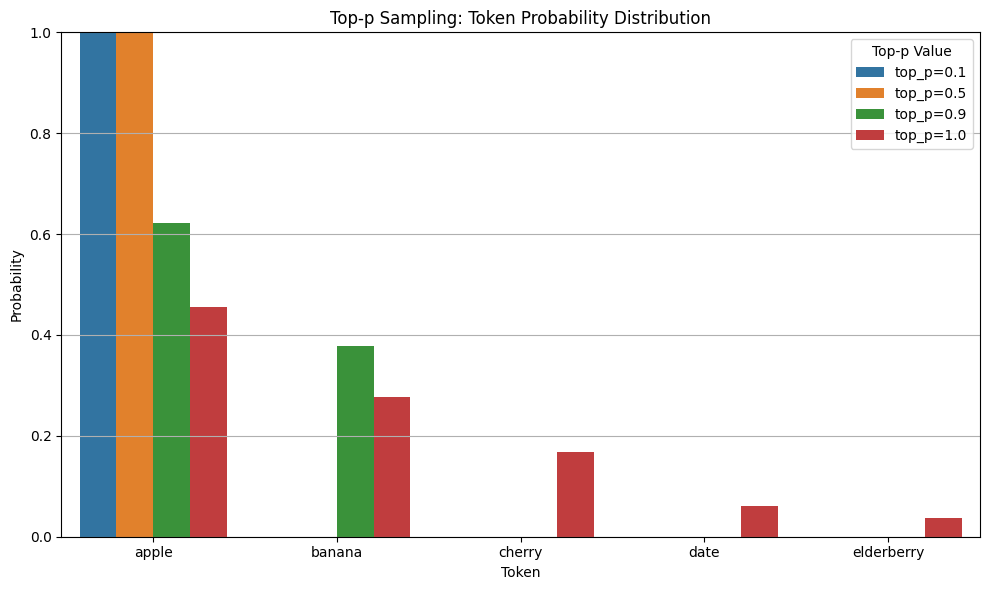

In [1]:
# Re-import necessary libraries after code execution state reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# トークンとその確率（合計1になるように正規化）
tokens = ["apple", "banana", "cherry", "date", "elderberry"]
logits = np.array([3.0, 2.5, 2.0, 1.0, 0.5])
exp_logits = np.exp(logits - np.max(logits))
probs = exp_logits / np.sum(exp_logits)

# 累積確率を計算して top_p のフィルタリングを適用する関数
def top_p_filter(probs, tokens, top_p):
    sorted_indices = np.argsort(probs)[::-1]
    sorted_probs = probs[sorted_indices]
    sorted_tokens = np.array(tokens)[sorted_indices]
    cumulative_probs = np.cumsum(sorted_probs)

    # top_p に満たすまでのトークンを残す
    mask = cumulative_probs <= top_p
    if not np.any(mask):  # top_p が小さすぎて何も選ばれない場合、最初の1個だけ残す
        mask[0] = True

    filtered_probs = sorted_probs * mask
    filtered_probs /= filtered_probs.sum()  # 再正規化

    return sorted_tokens, filtered_probs

# top_p の値を変えて結果を比較
top_p_values = [0.1, 0.5, 0.9, 1.0]
plot_data = []

for top_p in top_p_values:
    filtered_tokens, filtered_probs = top_p_filter(probs, tokens, top_p)
    for token, prob in zip(filtered_tokens, filtered_probs):
        plot_data.append({"Token": token, "Probability": prob, "Top_p": f"top_p={top_p}"})

df = pd.DataFrame(plot_data)

# グラフ表示
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Token", y="Probability", hue="Top_p")
plt.title("Top-p Sampling: Token Probability Distribution")
plt.ylabel("Probability")
plt.xlabel("Token")
plt.ylim(0, 1)
plt.legend(title="Top-p Value")
plt.grid(axis="y")
plt.tight_layout()
plt.show()
